In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Map grain growth in clouds at several pressure levels

In [2]:
import astropy.units as u
from matplotlib.colors import LogNorm, SymLogNorm

from maplib import load_out3
import map_growth as mg

In [3]:
OUTPUT_DIR = 'Cloud_Growth/'

lons  = np.arange(-180., 180.01, 15) # deg
lats  = np.arange(0., 67.51, 22.5) # deg
nprof = len(lons) * len(lats) # number of (lon, lat) profiles

p_convert = 1.e-6  # bar / (dyne/cm^2)

In [4]:
X, Y = np.meshgrid(lons,lats)

# Default contour levels to use
nlev = 21
log_zmin, log_zmax = -30, 5
lev  = np.linspace(log_zmin, log_zmax, nlev)

In [5]:
valnames  = ['J*_C', 'J*_SiO', 'J*_TiO2']
P_WANT    = 0.01 * u.bar # 10 mbar

Jstar  = mg.interpolate_pressure_map('nuclea', valnames, P_WANT.to('dyne/cm^2').value)

Text(0.5, 1.0, '10 bar mbar')

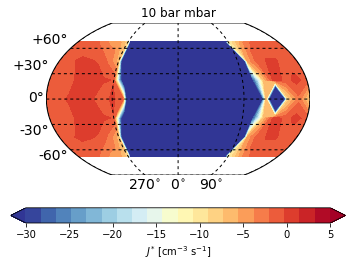

In [6]:
_ = mg.map_result(Jstar, lev,
               label=r'$J^{*}$ [cm$^{-3}$ s$^{-1}$]',
               ticks=np.arange(log_zmin, log_zmax+1)[::5])
plt.title('{:.0f} mbar'.format(P_WANT * 1.e3))

### Map number density of particles

In [7]:
valnames = ['N']
ndens = mg.interpolate_pressure_map('dist', valnames, P_WANT.to('bar').value)

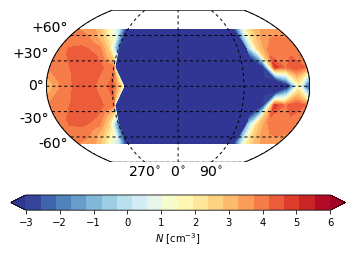

In [8]:
ndlev = np.linspace(-3, 6, nlev)
_ = mg.map_result(ndens, ndlev,
               label=r'$N$ [cm$^{-3}$]',
               ticks=np.arange(-3, 7))

## Do chinet

In [9]:
valnames = ['chinet']
pw = 0.1 *u.bar
chimap = mg.interpolate_pressure_map('dust', valnames, pw.to('dyne/cm^2').value)

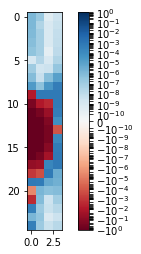

In [10]:
plt.imshow(chimap, norm=SymLogNorm(linthresh=1.e-10, vmin=-1.0, vmax=1.0), cmap=plt.cm.RdBu)
plt.colorbar()

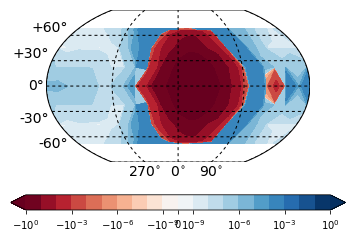

In [11]:
myticks = np.array([-3.0, -1.0, -1.e-3, -1.e-6, -1.e-9, 0.0, 1.e-9, 1.e-6, 1.e-3, 1.0, 3.0])
mg.map_symlognorm(chimap, lmin=-1.0, lmax=1.0, linthresh=1.e-9, ticks=myticks)